In [15]:
import matplotlib.pyplot as plt

from PIL import Image
import numpy as np
from skimage.color import rgb2yiq, yiq2rgb

# Carregar as imagens usando PIL
xadrez_img_pil = Image.open('XADREZ.png').convert('L')
xadrez_lowCont_img_pil = Image.open('xadrez_lowCont.png').convert('L')

# Converter para numpy array
xadrez_img_array = np.array(xadrez_img_pil)
xadrez_lowCont_img_array = np.array(xadrez_lowCont_img_pil)


In [16]:
def equalize_hist_channel(channel):
    hist, bins = np.histogram(channel.flatten(), 256, [0,1])
    cdf = hist.cumsum()

    if cdf[-1] == 0:
        return channel

    cdf_m = np.ma.masked_equal(cdf, 0) # Máscara de zeros
    cdf_m = (cdf_m - cdf_m.min()) * (1.0 / (cdf_m.max() - cdf_m.min())) # Equalização em si
    cdf = np.ma.filled(cdf_m, 0).astype(np.float64) # Devolve os zeros

    # Convertendo os valores de pixel em channel para inteiros antes de usá-los como índices
    channel_int = (channel * 255).astype(int)
    return cdf[channel_int].reshape(channel.shape)



def equalize_rgb_and_yiq_without_skimage(image_path):
    image = plt.imread(image_path)

    # RGB
    r_eq = equalize_hist_channel(image[:, :, 0])
    g_eq = equalize_hist_channel(image[:, :, 1])
    b_eq = equalize_hist_channel(image[:, :, 2])
    rgb_eq = np.stack([r_eq, g_eq, b_eq], axis=2)

    # YIQ
    yiq = rgb2yiq(image)
    y_eq = equalize_hist_channel(yiq[:, :, 0])
    yiq[:, :, 0] = y_eq
    yiq2rgb_eq = yiq2rgb(yiq)
    yiq2rgb_eq = np.clip(yiq2rgb_eq, 0, 1)

    return rgb_eq, yiq2rgb_eq


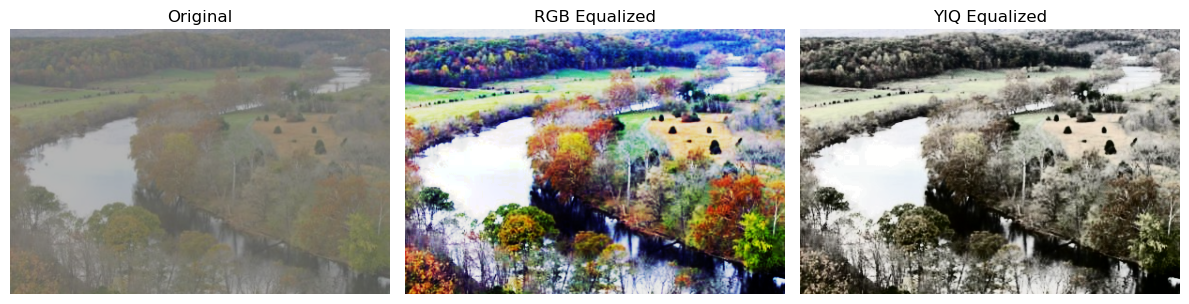

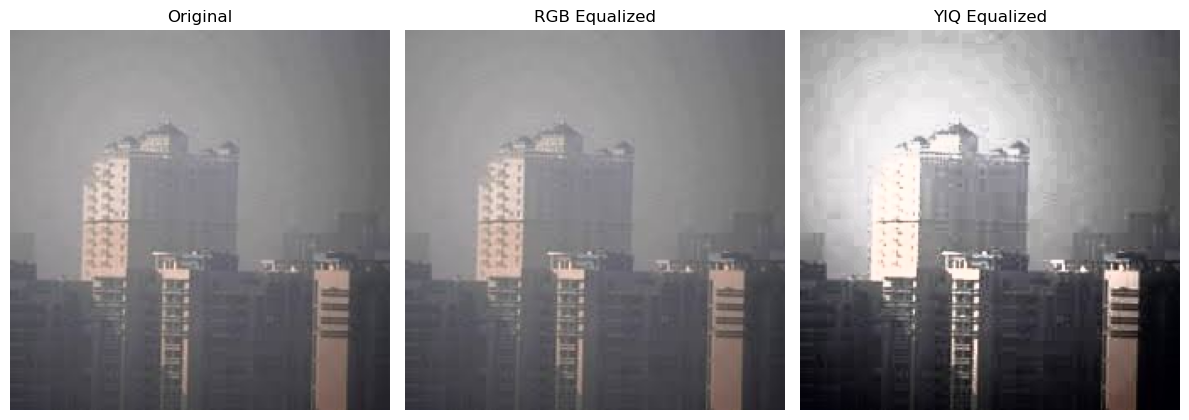

In [17]:
rgb_eq1, yiq2rgb_eq1 = equalize_rgb_and_yiq_without_skimage('outono_LC.png')

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(plt.imread('outono_LC.png'))
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(rgb_eq1)
plt.title('RGB Equalized')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(yiq2rgb_eq1)
plt.title('YIQ Equalized')
plt.axis('off')

plt.tight_layout()
plt.show()

#-----

rgb_eq2, yiq2rgb_eq2 = equalize_rgb_and_yiq_without_skimage('predios.jpeg')

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(plt.imread('predios.jpeg'))
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(rgb_eq2)
plt.title('RGB Equalized')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(yiq2rgb_eq2)
plt.title('YIQ Equalized')
plt.axis('off')

plt.tight_layout()
plt.show()

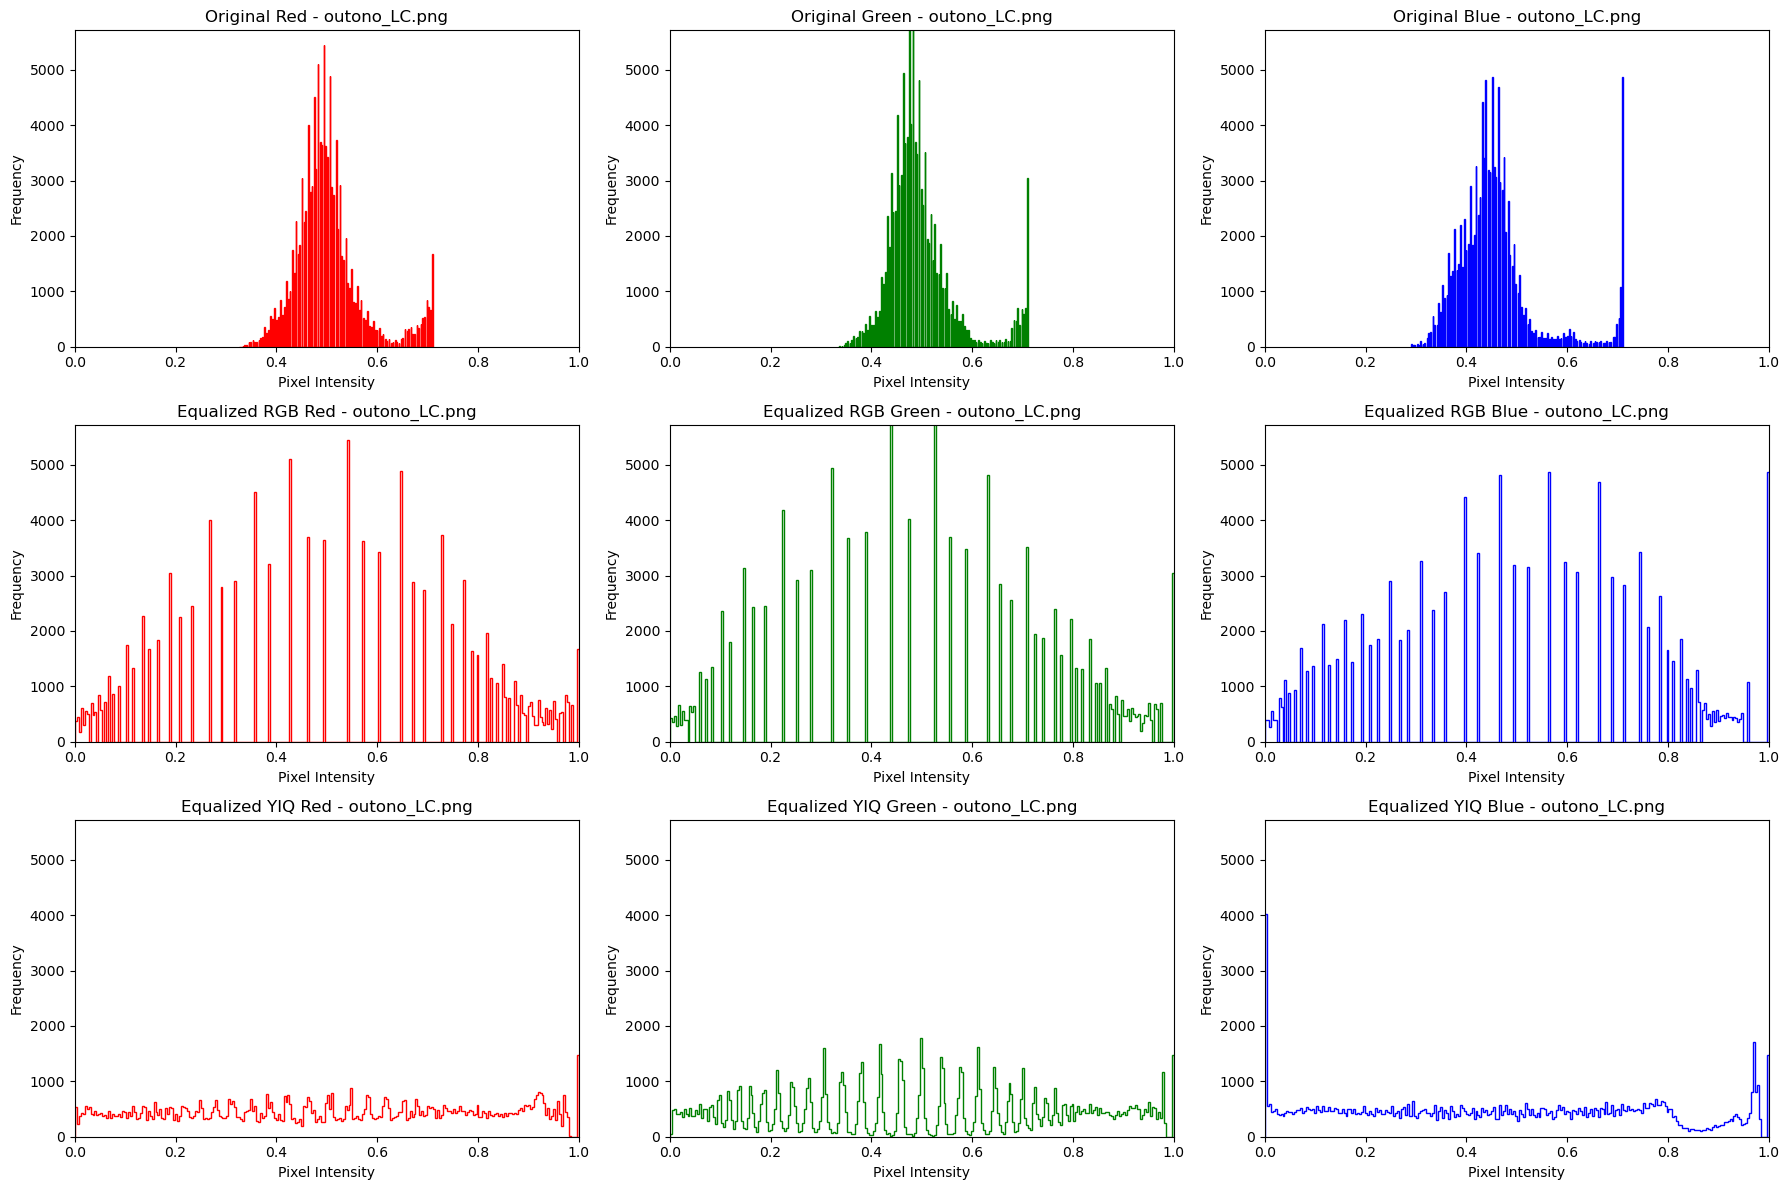

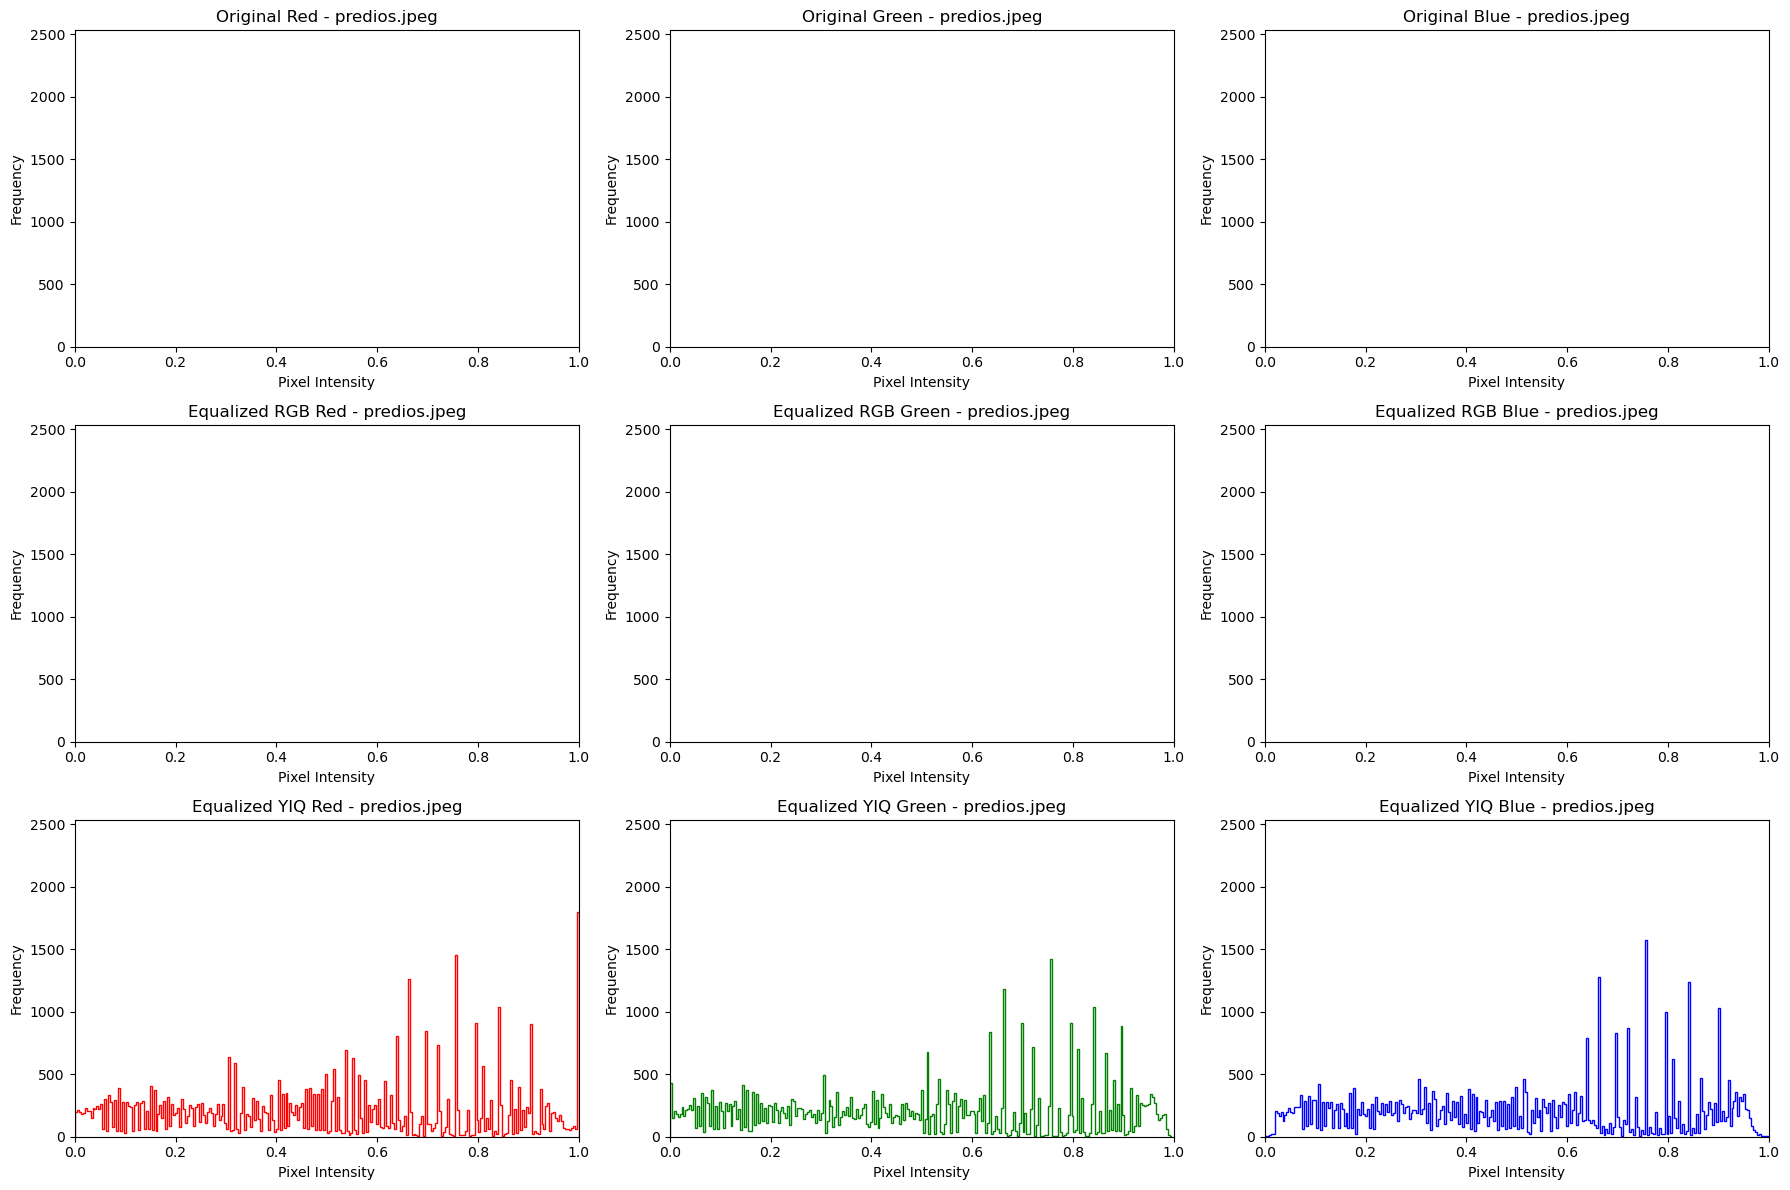

os valores que estão faltando existem, mas não consegui inserir no gráfico, vou printar eles em forma numérica mesmo


array([[[137, 137, 137],
        [137, 137, 137],
        [137, 137, 137],
        ...,
        [103, 102, 108],
        [103, 102, 107],
        [104, 103, 108]],

       [[137, 137, 137],
        [137, 137, 137],
        [138, 138, 138],
        ...,
        [103, 102, 108],
        [103, 102, 107],
        [104, 103, 108]],

       [[138, 138, 138],
        [138, 138, 138],
        [138, 138, 138],
        ...,
        [103, 102, 108],
        [103, 102, 107],
        [104, 103, 108]],

       ...,

       [[ 53,  52,  60],
        [ 53,  52,  60],
        [ 53,  52,  60],
        ...,
        [ 36,  35,  41],
        [ 36,  35,  41],
        [ 36,  35,  41]],

       [[ 49,  48,  56],
        [ 49,  48,  56],
        [ 50,  49,  57],
        ...,
        [ 36,  35,  41],
        [ 36,  35,  41],
        [ 36,  35,  41]],

       [[ 49,  49,  59],
        [ 50,  50,  60],
        [ 50,  50,  60],
        ...,
        [ 34,  33,  41],
        [ 34,  33,  41],
        [ 35,  34,  40]]

array([[[137, 137, 137],
        [137, 137, 137],
        [137, 137, 137],
        ...,
        [103, 102, 108],
        [103, 102, 107],
        [104, 103, 108]],

       [[137, 137, 137],
        [137, 137, 137],
        [138, 138, 138],
        ...,
        [103, 102, 108],
        [103, 102, 107],
        [104, 103, 108]],

       [[138, 138, 138],
        [138, 138, 138],
        [138, 138, 138],
        ...,
        [103, 102, 108],
        [103, 102, 107],
        [104, 103, 108]],

       ...,

       [[ 53,  52,  60],
        [ 53,  52,  60],
        [ 53,  52,  60],
        ...,
        [ 36,  35,  41],
        [ 36,  35,  41],
        [ 36,  35,  41]],

       [[ 49,  48,  56],
        [ 49,  48,  56],
        [ 50,  49,  57],
        ...,
        [ 36,  35,  41],
        [ 36,  35,  41],
        [ 36,  35,  41]],

       [[ 49,  49,  59],
        [ 50,  50,  60],
        [ 50,  50,  60],
        ...,
        [ 34,  33,  41],
        [ 34,  33,  41],
        [ 35,  34,  40]]

In [18]:
import matplotlib.pyplot as plt
def plot_histogram(image, title, color='gray'):
    plt.hist(image.ravel(), bins=256, histtype='step', color=color)
    plt.title(title)
    plt.xlim([0, 1])
    plt.ylim([0, image.size * 0.05])
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

# Load the original images
original_outono = plt.imread('outono_LC.png')
original_predios = plt.imread('predios.jpeg')

# Equalize the images
rgb_eq_outono, yiq2rgb_eq_outono = equalize_rgb_and_yiq_without_skimage('outono_LC.png')
rgb_eq_predios, yiq2rgb_eq_predios = equalize_rgb_and_yiq_without_skimage('predios.jpeg')

# Plot histograms for 'outono_LC.png'
plt.figure(figsize=(18, 12))

plt.subplot(3, 3, 1)
plot_histogram(original_outono[:,:,0], 'Original Red - outono_LC.png', 'red')
plt.subplot(3, 3, 2)
plot_histogram(original_outono[:,:,1], 'Original Green - outono_LC.png', 'green')
plt.subplot(3, 3, 3)
plot_histogram(original_outono[:,:,2], 'Original Blue - outono_LC.png', 'blue')

plt.subplot(3, 3, 4)
plot_histogram(rgb_eq_outono[:,:,0], 'Equalized RGB Red - outono_LC.png', 'red')
plt.subplot(3, 3, 5)
plot_histogram(rgb_eq_outono[:,:,1], 'Equalized RGB Green - outono_LC.png', 'green')
plt.subplot(3, 3, 6)
plot_histogram(rgb_eq_outono[:,:,2], 'Equalized RGB Blue - outono_LC.png', 'blue')

plt.subplot(3, 3, 7)
plot_histogram(yiq2rgb_eq_outono[:,:,0], 'Equalized YIQ Red - outono_LC.png', 'red')
plt.subplot(3, 3, 8)
plot_histogram(yiq2rgb_eq_outono[:,:,1], 'Equalized YIQ Green - outono_LC.png', 'green')
plt.subplot(3, 3, 9)
plot_histogram(yiq2rgb_eq_outono[:,:,2], 'Equalized YIQ Blue - outono_LC.png', 'blue')

plt.tight_layout()
plt.show()

# Plot histograms for 'predios.jpeg'
plt.figure(figsize=(18, 12))

plt.subplot(3, 3, 1)
plot_histogram(original_predios[:,:,0], 'Original Red - predios.jpeg', 'red')
plt.subplot(3, 3, 2)
plot_histogram(original_predios[:,:,1], 'Original Green - predios.jpeg', 'green')
plt.subplot(3, 3, 3)
plot_histogram(original_predios[:,:,2], 'Original Blue - predios.jpeg', 'blue')

plt.subplot(3, 3, 4)
plot_histogram(rgb_eq_predios[:,:,0], 'Equalized RGB Red - predios.jpeg', 'red')
plt.subplot(3, 3, 5)
plot_histogram(rgb_eq_predios[:,:,1], 'Equalized RGB Green - predios.jpeg', 'green')
plt.subplot(3, 3, 6)
plot_histogram(rgb_eq_predios[:,:,2], 'Equalized RGB Blue - predios.jpeg', 'blue')

plt.subplot(3, 3, 7)
plot_histogram(yiq2rgb_eq_predios[:,:,0], 'Equalized YIQ Red - predios.jpeg', 'red')
plt.subplot(3, 3, 8)
plot_histogram(yiq2rgb_eq_predios[:,:,1], 'Equalized YIQ Green - predios.jpeg', 'green')
plt.subplot(3, 3, 9)
plot_histogram(yiq2rgb_eq_predios[:,:,2], 'Equalized YIQ Blue - predios.jpeg', 'blue')

plt.tight_layout()
plt.show()
print("os valores que estão faltando existem, mas não consegui inserir no gráfico, vou printar eles em forma numérica mesmo")
display(rgb_eq_predios, original_predios)